# Stromverbrauchsprognose unter Verwendung von Wetterdaten
In diesem Projekt soll anhand von bereitgestellten Wetter- und Energieverbrauchsinformationen eine Prognose für den Energieverbrauch 1h bzw. 24h nach vorne erstellt werden. 

## Setup

In [1]:
#
import pandas as pd

#
import matplotlib.pyplot as plt
import seaborn as sns

#Show mulitple outputs within one kernel-----------------------
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

%matplotlib inline
#pd.set_option('display.float_format', lambda x: '%.3f' % x) #diplay command only show the first 5 digits

# 1. Überblick und  Datenbereinigung 
Wir arbeiten hierfür mit zwei Datensätzen.
* 'SystemLevelSummer.csv' enthält Informationen zum Stromverbrauch. 
* 'weatherDFLocalSummer.csv' enthält Wetterinformationen, welche im Wesentlichen vorhergesagt werden sollen.

## 1.1 Laden der Datensätze

In [2]:
powerDF = pd.read_csv('./data/SystemLevelSummer.csv')
weatherDF = pd.read_csv('./data/WeatherLocalSummer.csv')

In [3]:
powerDF.columns
powerDF

Index(['#DATE', ' TOTAL_LOAD'], dtype='object')

,#DATE,TOTAL_LOAD
0,2011-06-01 00:15,639691.499583
1,2011-06-01 00:30,624777.006874
2,2011-06-01 00:45,610658.780201
3,2011-06-01 01:00,597351.542302
4,2011-06-01 01:15,583547.506936
...,...,...
8827,2011-08-31 23:00,847367.609038
8828,2011-08-31 23:15,822442.490218
8829,2011-08-31 23:30,802867.468608
8830,2011-08-31 23:45,784569.419215


In [4]:
weatherDF.columns
weatherDF

Index(['# DATE', ' TEMPERATURE [F]', ' HUMIDITY [%]', ' PRESSURE [inHg]',
       ' WIND_SPEED [m/s]', ' RAINFALL [mm]'],
      dtype='object')

,# DATE,TEMPERATURE [F],HUMIDITY [%],PRESSURE [inHg],WIND_SPEED [m/s],RAINFALL [mm]
0,2011-05-30 17:00,86.635,51.563,29.941,7.523,0.0
1,2011-05-30 18:00,84.931,56.044,29.945,7.453,0.0
2,2011-05-30 19:00,83.100,61.551,29.952,6.930,0.0
3,2011-05-30 20:00,80.823,69.142,29.967,6.979,0.0
4,2011-05-30 21:00,79.305,75.395,29.983,6.677,0.0
...,...,...,...,...,...,...
2251,2011-09-01 12:00,88.686,55.515,29.945,5.650,0.0
2252,2011-09-01 13:00,90.327,49.891,29.923,5.407,0.0
2253,2011-09-01 14:00,93.014,41.848,29.895,5.461,0.0
2254,2011-09-01 15:00,94.529,37.137,29.868,5.162,0.0


## 1.2 Überblick über die Daten 
Zunächst soll sich von den Datensätzen ein grober Überblick verschaffen werden, um ...

In [9]:
powerDF.describe()
weatherDF.describe()

,TOTAL_LOAD
count,8.832000e+03
mean,9.364204e+05
std,2.430150e+05
min,4.746091e+05
25%,7.120265e+05
50%,9.289187e+05
75%,1.150144e+06
max,1.433244e+06


,TEMPERATURE [F],HUMIDITY [%],PRESSURE [inHg],WIND_SPEED [m/s],RAINFALL [mm]
count,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000
mean,84.193374,64.212354,29.917043,3.917266,0.007017
std,6.444205,18.236110,0.075241,1.932054,0.059717
min,66.617000,21.227000,29.719000,0.000000,-0.180000
25%,79.109750,47.808250,29.867750,2.487000,0.000000
50%,82.881000,66.830500,29.912500,3.733500,0.000000
75%,89.305750,81.200250,29.959000,5.313000,0.000000
max,102.894000,98.210000,30.197000,11.592000,1.800000


In [ ]:
#Funktion zur detektion von nan werten
#Detektion von ausreisern

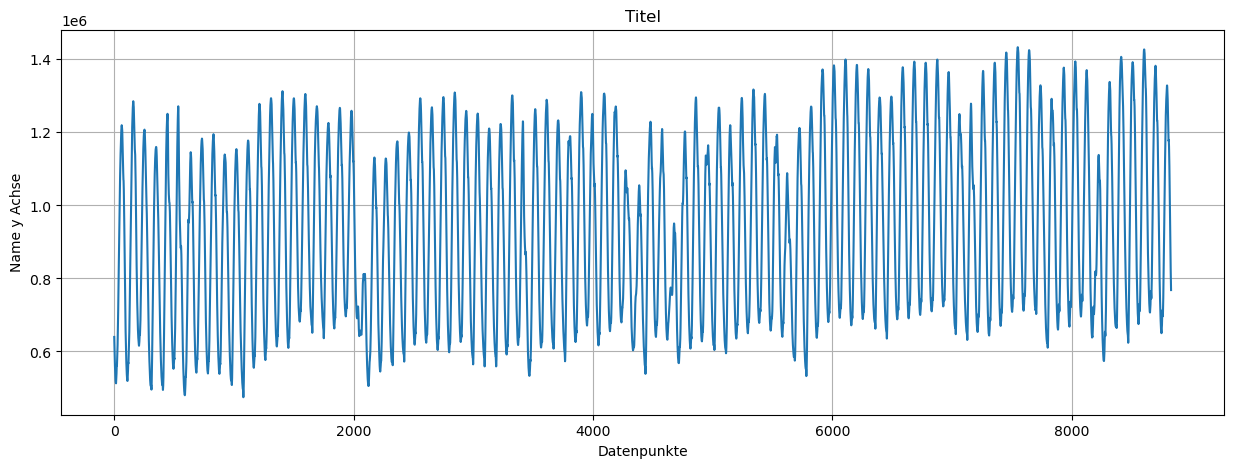

In [22]:
#Ilona: Titel, Beschriftung der Achsen (Bei dem Wetterdatensatz dementsprechend allgmein), Legende einheitlich , Zeit als Index (noch nicht das df ändern, das kommt später)und was sonst noch einfällt 
def plotDF(df, column, title, y_axis):
    plt.figure(figsize=(15, 5))

    plt.plot(df.index, df[column])

    plt.title(title)
    plt.xlabel('Datenpunkte')
    plt.ylabel(y_axis)
    plt.grid(True)
    plt.show()

plotDF(powerDF, ' TOTAL_LOAD', 'Titel', 'Name y Achse')



 Beschreibung der Datensätze 
* *Spalten, INformationen, Länge(count), Aufzeichungsabstände, Lücken? Extreme Ausreißer? Zeitraum? Einheiten?

## 1.3 Überarbeitung der Datenstruktur
Für die Übersicht und ....

In [ ]:
def generalModification(df):
    #General Modifications---------------------
    df.columns = df.columns.str.replace(" ", "")
    #dropNan fehlt noch 

    #Date Modifications------------------------
    df['#DATE'] = pd.to_datetime(df['#DATE'])
    df = df.set_index('#DATE').sort_index()

    #Separate the datetime in separate columns
    df['MONTH'] = df.index.month
    df['DAY'] = df.index.day

    return df

In [ ]:
powerDF = generalModification(powerDF)
weatherDF = generalModification(weatherDF)

### Verfeinerte Anpassung

Anderer Zeitraum ... Anpassung durch....

In [ ]:
start_date = max(powerDF.index.min(), weatherDF.index.min())
end_date = min(powerDF.index.max(), weatherDF.index.max())

powerDF = powerDF.loc[start_date:end_date]
weatherDF = weatherDF.loc[start_date:end_date]

#### powerDF
Zudem sind die Zeitabstände von powerDF ...., deswegen ... . 
Dazu rechnen wir die einzelnen Werte zusammen, da
(Möglich da keine Lücken)

In [ ]:
powerDF = powerDF.resample('h').sum()

#### weatherDF
Fahrenheit zu Celcius

In [ ]:
weatherDF['TEMPERATURE[F]'] = (weatherDF['TEMPERATURE[F]']-32)/1.8
weatherDF = weatherDF.rename(columns={'TEMPERATURE[F]': 'TEMPERATURE[C]'})

# 2. Datenanalyse

# 2.1 Linearität

## 2.2 Periodizität
Widerholende Struktur innerhalb der daten zu beobachten, speziell in TEmperatur, Feuchtigkeit; Windstärke und Stromverbrauch. Deswegen genauere Betrachtung

<Axes: xlabel='#DATE'>

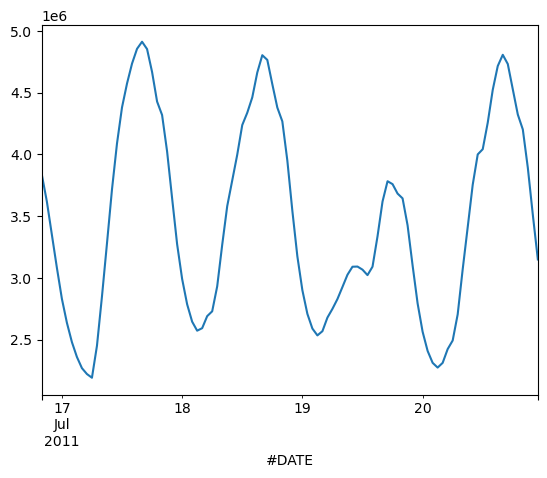

In [ ]:
#PLot mit den relevanten Spalten aus beiden Dataframes
powerDF['TOTAL_LOAD'][1100:1200].plot()

## 2.3 Korrelation 

<Axes: >

Text(0.5, 1.0, 'Korrelationsmatrix der Wetter- und Stromdaten')

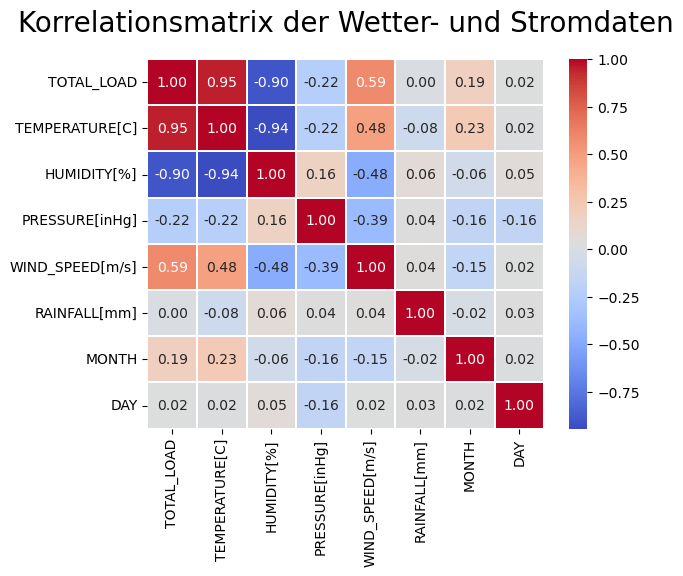

In [ ]:
#Merge df in order to compare all relevant columns and drop duplicates
necCol = powerDF.columns.difference(weatherDF.columns)
mergedDF = pd.merge(powerDF[necCol], weatherDF, on='#DATE')

corrMatrix = mergedDF.corr()
sns.heatmap(corrMatrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.2)
plt.title('Korrelationsmatrix der Wetter- und Stromdaten', size=20, pad = 20)
plt.show()

Was ist zu sehen? 

p Value etc. 

## 2.4 Ausreißer 

#Funktion schreiben die diese detektiert
22.06.2011 
https://www.spiegel.de/panorama/regen-hagel-sturm-tausende-haushalte-nach-unwetter-ohne-strom-a-769966.html 

19.07.2011 ??? 

<Axes: xlabel='#DATE'>

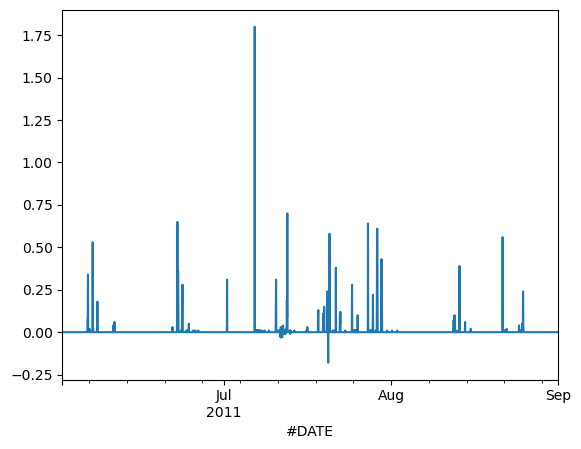

In [ ]:
weatherDF['RAINFALL[mm]'].plot()